# <center>Деревья регрессии</center>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим сдедующую задачу регрессии:

In [2]:
X = np.linspace(-2, 2, 7)
y = X ** 3

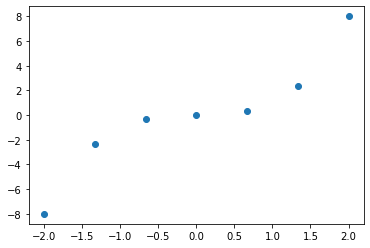

In [3]:
plt.scatter(X, y)
plt.show()

Проделаем несколько шагов в построении дерева регрессии. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. В случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

**Задание 1.** Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

In [4]:
t = np.linspace(-2, 2, 100)

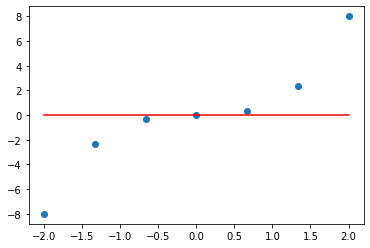

In [5]:
plt.plot(t,[y.mean() for i in t],c='r')
plt.scatter(X, y)
plt.show()

**Задание 2.** Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [6]:
#делим элементы на право-лево
def right_left(i,X,y):
    y_right=y[X>0]
    y_left=y[X <= 0]
    if i>0:
        return y_right.mean() # элементы справа
    else:
        return  y_left.mean() # элементы слева

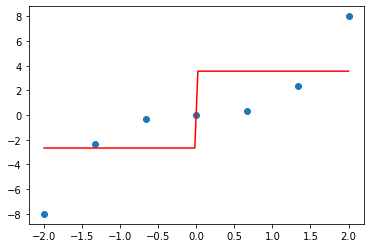

In [8]:
plt.plot(t,[right_left(i,X,y) for i in t],c='r')
plt.scatter(X, y)
plt.show()

В алгоритме построения дерева регрессии признак и значение порога, по которым происходит разбиение выборки, выбираются по дисперсионному критерию:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

**Задание 3.** Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [9]:
def disp(x,y):
    return 1/(len(x))*np.sum((y-np.sum(y)/(len(x)))**2)

In [10]:
def regression_var_criterion(X, y, t):
    X_right= X[X > t] 
    y_right= y[X > t]
    X_left= X[X <= t] 
    y_left= y[X <= t]
    return disp(X,y)-len(X_left)/len(X)*disp(X_left,y_left)-len(X_right)/len(X)*disp(X_right,y_right)

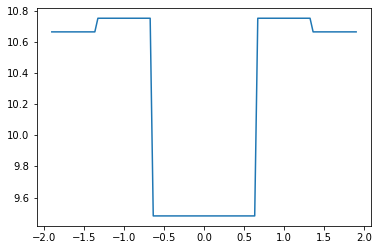

In [12]:
plt.plot(t,[regression_var_criterion(X,y,i) for i in t])

Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?

нет

**Задание 4.** Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

In [19]:
#делим элементы на право-лево
def right_left_2levels(i,X,y):
    X_right=X[X>0]
    y_right=y[X>0]
    X_left=X[X<=0]
    y_left=y[X <= 0]
    if i<=0:
        if i<=-1.5:
            return y_left[X_left<=-1.5].mean()
        if i>-1.5:
            return y_left[X_left>-1.5].mean()
    if i>0:
        if i>1.5:
            return y_right[X_right>1.5].mean()
        else:
            return y_right[X_right<=1.5].mean()

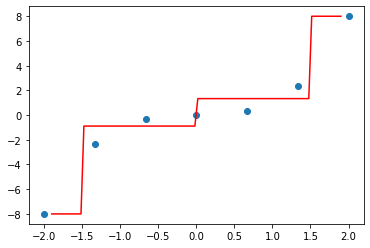

In [21]:
plt.plot(t,[right_left_2levels(i,X,y) for i in t],c='r')
plt.scatter(X, y)
plt.show()

Из скольки отрезков состоит график, изображающий предсказания построенного дерева на отрезке $[-2, 2]$?

Из 7